In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

In [11]:
# Load data
california = fetch_california_housing()
X = pd.DataFrame(california.data, columns=california.feature_names)
y = pd.Series(california.target, name="MedHouseVal")

In [13]:
# Dataset shape
print("Dataset shape: ", X.shape)

Dataset shape:  (20640, 8)


In [14]:
# Preview features
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [15]:
# Preview target
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

<Figure size 1200x800 with 0 Axes>

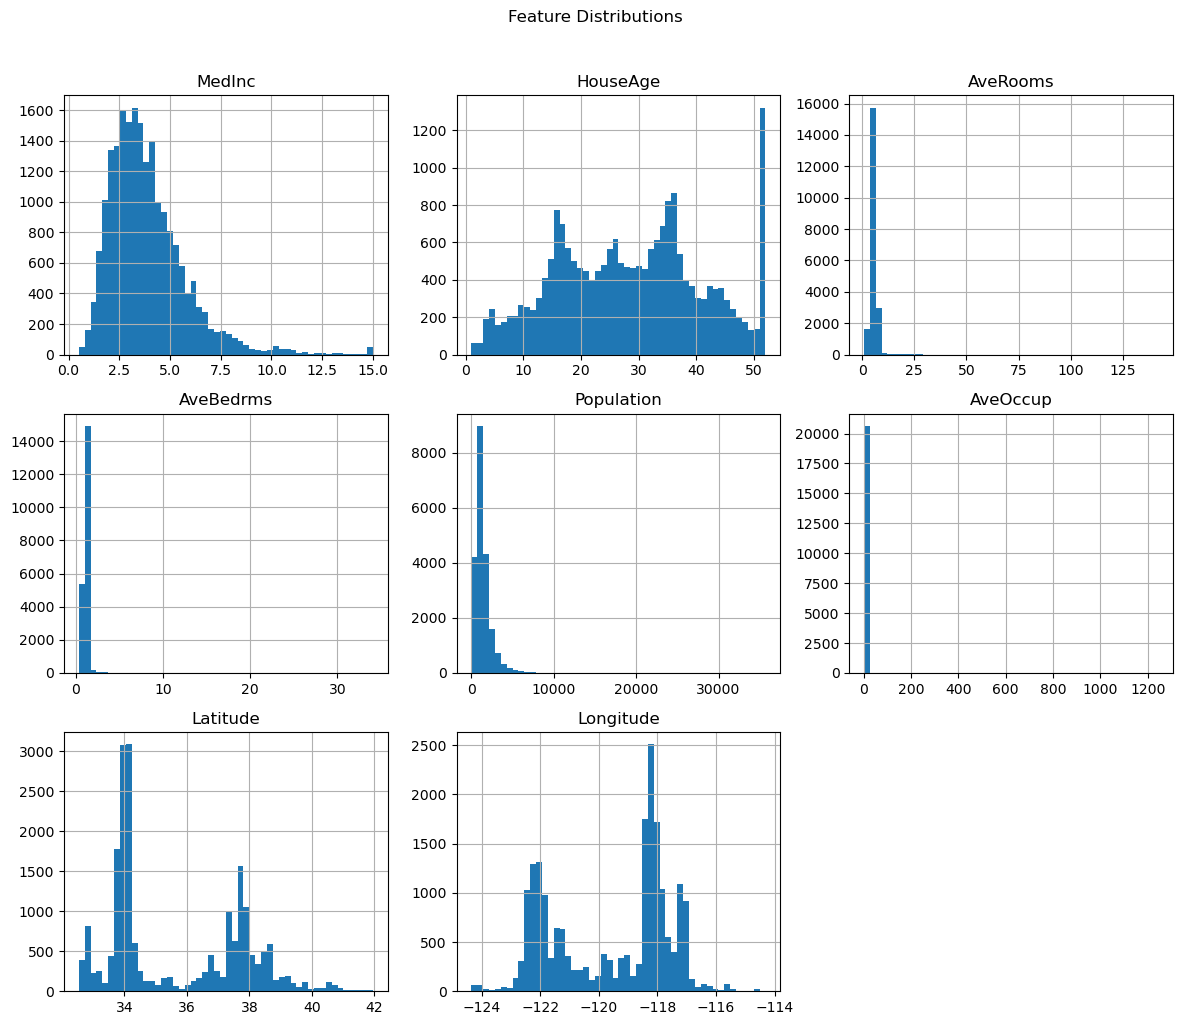

In [16]:
# EDA: check feature distribution
plt.figure(figsize=(12, 8))
X.hist(bins=50, figsize=(12, 10))
plt.suptitle("Feature Distributions", y=1.02)
plt.tight_layout()
plt.show()

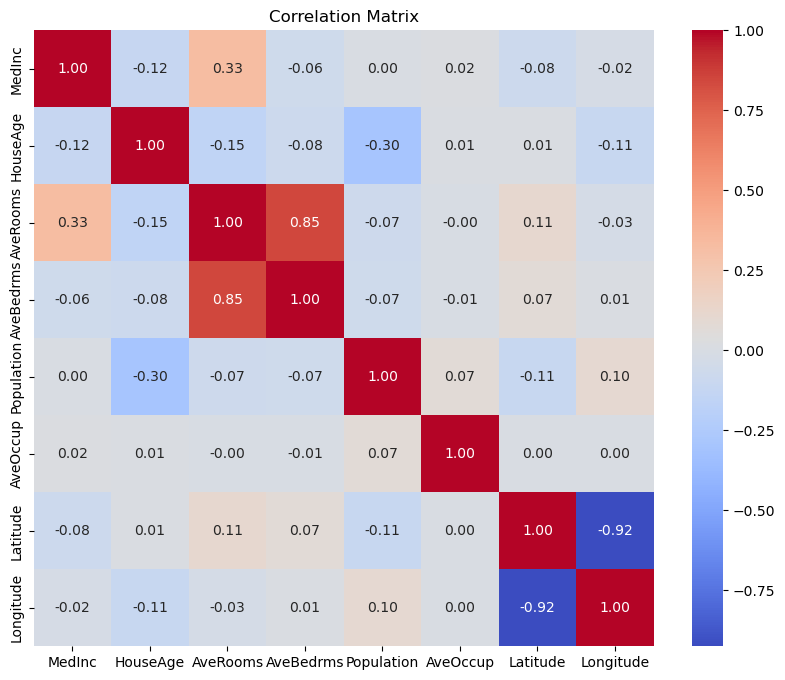

In [17]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
corr_matrix = X.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [18]:
# Train test splot
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
# Train model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [22]:
# Prediction
y_pred = model.predict(X_test_scaled)

In [26]:
# Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation (With Scaling):")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")


Model Evaluation (With Scaling):
MSE: 0.53
RMSE: 0.73
R²: 0.60


In [27]:
# Compare coefficients (scaled vs unscaled)
coefficients = pd.DataFrame({
    'Feature': california.feature_names,
    'Coefficient (Unscaled)': LinearRegression().fit(X_train, y_train).coef_,
    'Coefficient (Scaled)': model.coef_
})
print("\nFeature Coefficients:")
print(coefficients)


Feature Coefficients:
      Feature  Coefficient (Unscaled)  Coefficient (Scaled)
0      MedInc            4.458226e-01              0.849222
1    HouseAge            9.681868e-03              0.122119
2    AveRooms           -1.220951e-01             -0.299558
3   AveBedrms            7.785996e-01              0.348410
4  Population           -7.757404e-07             -0.000884
5    AveOccup           -3.370027e-03             -0.041698
6    Latitude           -4.185367e-01             -0.893856
7   Longitude           -4.336880e-01             -0.868617


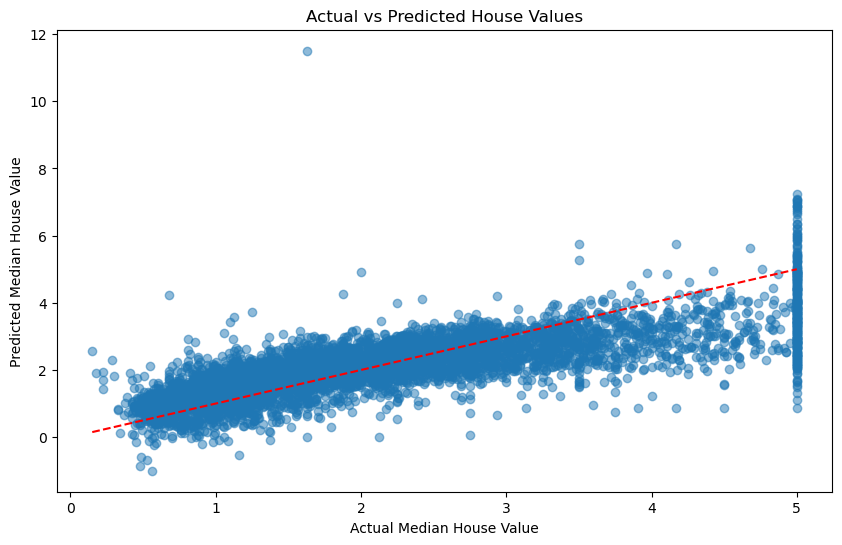

In [28]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Actual vs Predicted House Values")
plt.show()

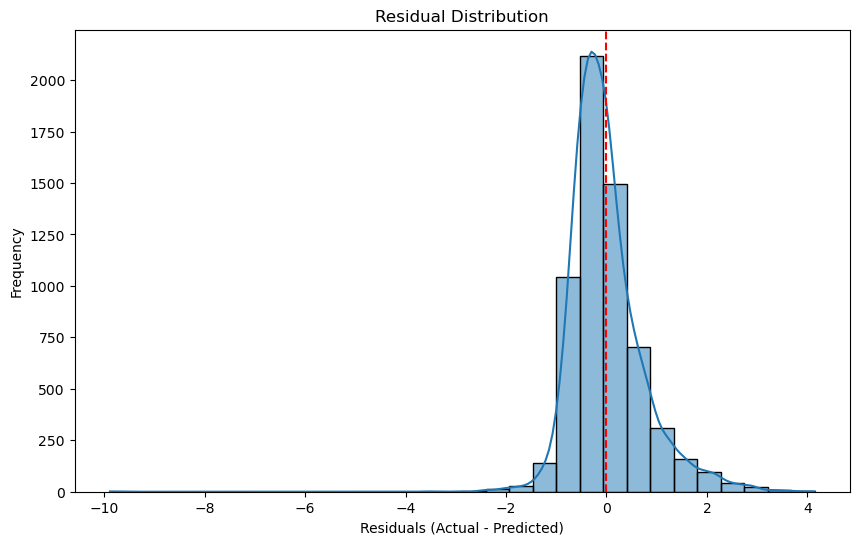

In [29]:
# Plot residuals (errors)
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.axvline(x=0, color='r', linestyle='--')
plt.xlabel("Residuals (Actual - Predicted)")
plt.ylabel("Frequency")
plt.title("Residual Distribution")
plt.show()

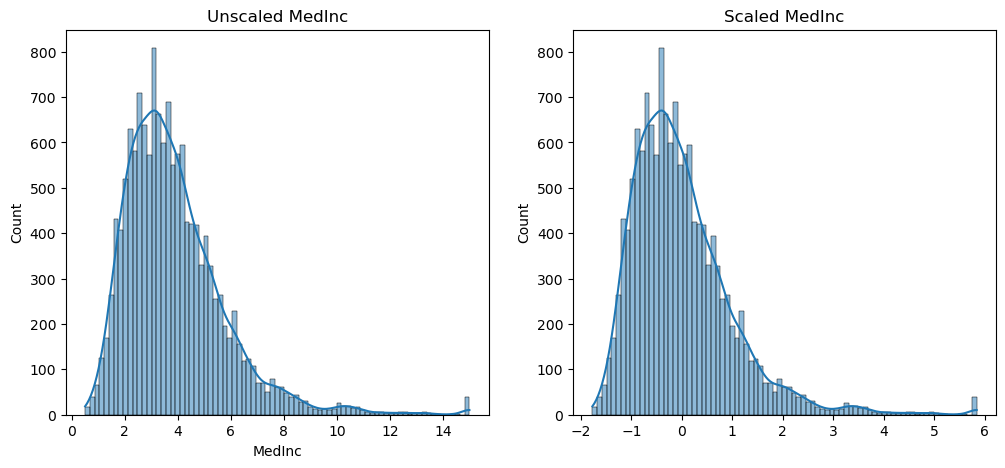

In [31]:
# Plot scaled vs unscaled distributions (example: 'MedInc')
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(X_train['MedInc'], kde=True)
plt.title("Unscaled MedInc")

plt.subplot(1, 2, 2)
sns.histplot(X_train_scaled[:, 0], kde=True)  # MedInc is the first feature
plt.title("Scaled MedInc")
plt.show()

In [33]:
# Ridge Regression with default alpha (lambda)
ridge = Ridge(alpha=1.0)  # alpha = regularization strength
ridge.fit(X_train_scaled, y_train)

Ridge()

In [36]:
# Predictions
from numpy import mean


y_pred = ridge.predict(X_test_scaled)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Ridge Regression Results:")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

Ridge Regression Results:
MSE: 0.5305
RMSE: 0.7284
R²: 0.5958


In [38]:
# Compare coefficients
coefficients = pd.DataFrame({
    'Feature': california.feature_names,
    'Linear Regression': model.coef_,
    'Ridge Regression': ridge.coef_
})
print("\nFeature Coefficients Comparison:")
print(coefficients)


Feature Coefficients Comparison:
      Feature  Linear Regression  Ridge Regression
0      MedInc           0.849222          0.849152
1    HouseAge           0.122119          0.122208
2    AveRooms          -0.299558         -0.299309
3   AveBedrms           0.348410          0.348103
4  Population          -0.000884         -0.000854
5    AveOccup          -0.041698         -0.041702
6    Latitude          -0.893856         -0.893003
7   Longitude          -0.868617         -0.867752


In [39]:
# Hyperparameter Tuning: Finding Optimal alpha
from sklearn.linear_model import RidgeCV

# Test alphas (logarithmic range)
alphas = np.logspace(-3, 3, 100)  # [0.001, 0.01, ..., 1000]

# RidgeCV with cross-validation
ridge_cv = RidgeCV(alphas=alphas, cv=5)
ridge_cv.fit(X_train_scaled, y_train)

print(f"\nBest alpha: {ridge_cv.alpha_:.4f}")

# Train with best alpha
ridge_optimized = Ridge(alpha=ridge_cv.alpha_)
ridge_optimized.fit(X_train_scaled, y_train)
y_pred_optimized = ridge_optimized.predict(X_test_scaled)

print(f"Optimized R²: {r2_score(y_test, y_pred_optimized):.4f}")


Best alpha: 5.7224
Optimized R²: 0.5959


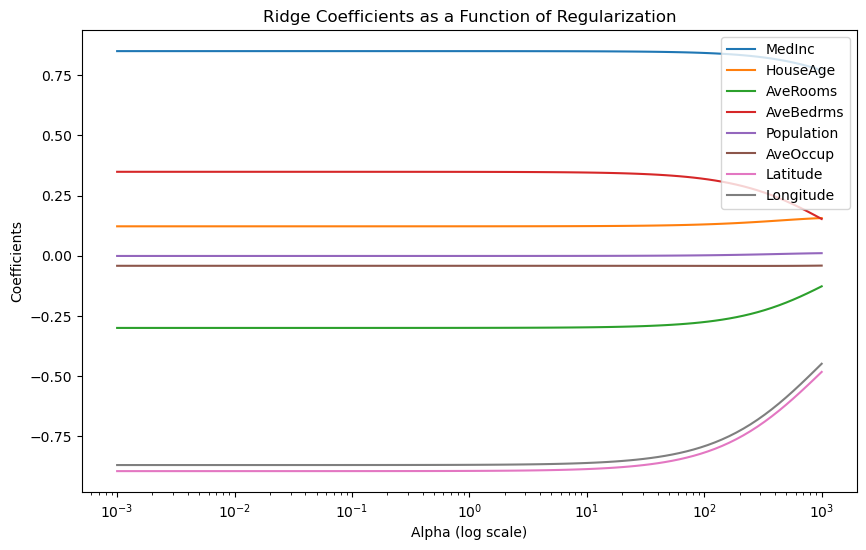

In [40]:
# Visualization: Coefficient Paths vs. alpha
# Plot how coefficients change with alpha
alphas = np.logspace(-3, 3, 100)
coefs = []
for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(X_train_scaled, y_train)
    coefs.append(ridge.coef_)

plt.figure(figsize=(10, 6))
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlabel('Alpha (log scale)')
ax.set_ylabel('Coefficients')
ax.set_title('Ridge Coefficients as a Function of Regularization')
plt.legend(california.feature_names)
plt.show()

In [41]:
# Comparison with Lasso (L1 Regularization)
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.01)  # Lasso can set some coefficients to exactly zero
lasso.fit(X_train_scaled, y_train)

print("\nLasso Coefficients:")
print(pd.Series(lasso.coef_, index=california.feature_names))


Lasso Coefficients:
MedInc        0.795054
HouseAge      0.126274
AveRooms     -0.161846
AveBedrms     0.209063
Population    0.000000
AveOccup     -0.031214
Latitude     -0.789968
Longitude    -0.757009
dtype: float64
